https://bradleyboehmke.github.io/HOML/mars.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt

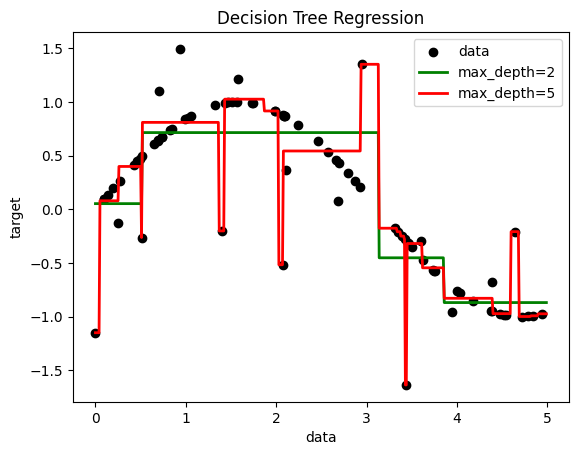

In [2]:
import numpy as np

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
from sklearn.tree import DecisionTreeRegressor

clf_1 = DecisionTreeRegressor(max_depth=2)
clf_2 = DecisionTreeRegressor(max_depth=5)
clf_1.fit(X, y)
clf_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = clf_1.predict(X_test)
y_2 = clf_2.predict(X_test)

# Plot the results
import pylab as pl

pl.figure()
pl.scatter(X, y, c="k", label="data")
pl.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
pl.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
pl.xlabel("data")
pl.ylabel("target")
pl.title("Decision Tree Regression")
pl.legend()
pl.show()

<ipython-input-3-c254a97a5ee7>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)


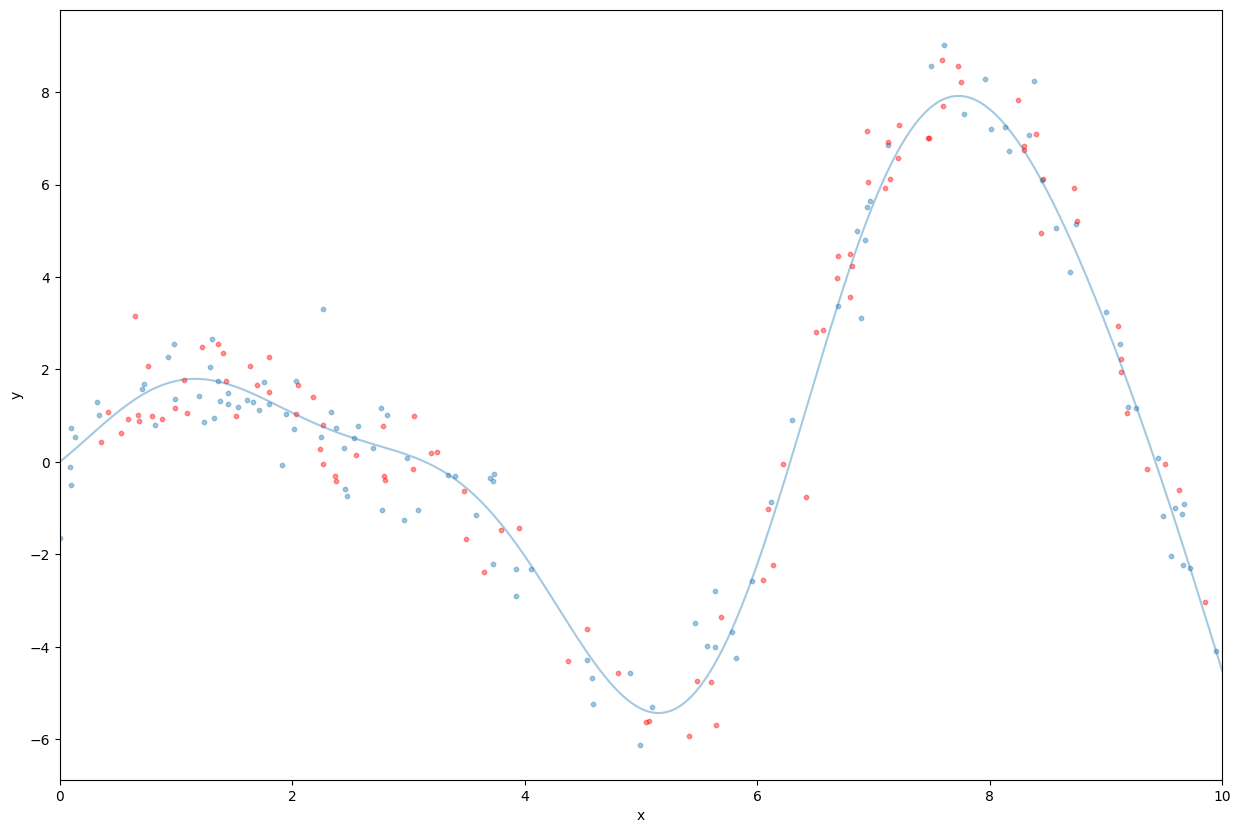

In [3]:



def ground_truth(x):
    """Ground truth -- function to approximate"""
    return x * np.sin(x) + np.sin(2 * x)

def gen_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(13)
    x = np.random.uniform(0, 10, size=n_samples)
    x.sort()
    y = ground_truth(x) + 0.75 * np.random.normal(size=n_samples)
    train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)
    x_train, y_train = x[train_mask, np.newaxis], y[train_mask]
    x_test, y_test = x[~train_mask, np.newaxis], y[~train_mask]
    return x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = gen_data(200)
# plot ground truth
x_plot = np.linspace(0, 10, 500)

def plot_data(figsize=(8, 5)):
    fig = plt.figure(figsize=figsize)
    gt = plt.plot(x_plot, ground_truth(x_plot), alpha=0.4, label='ground truth')
    # plot training and testing data
    plt.scatter(X_train, y_train, s=10, alpha=0.4)
    plt.scatter(X_test, y_test, s=10, alpha=0.4, color='red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')

plot_data(figsize=(15, 10))

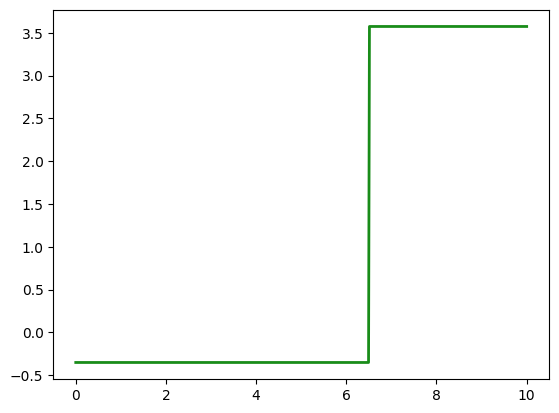

In [4]:
from sklearn.tree import DecisionTreeRegressor
#plot_data()
est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
label='RT max_depth=1', color='g', alpha=0.9, linewidth=2)


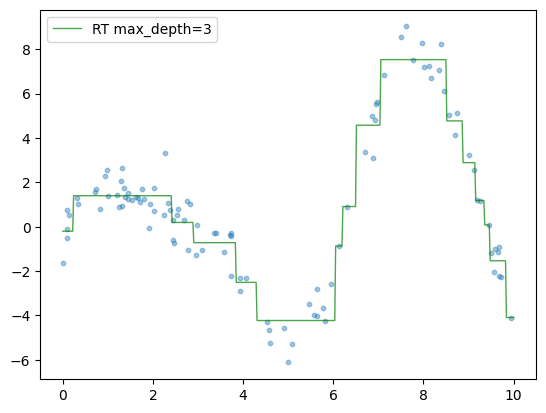

In [5]:
est = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
label='RT max_depth=3', color='g', alpha=0.7, linewidth=1)
plt.scatter(X_train, y_train, s=10, alpha=0.4)
plt.legend(loc='upper left')

## Ejercicio

1- Generar los datos de la fución indicada a en la celda siguiente.
2- Aplicar diferentes regresores incluido la regresión lineal.
3- Calcular las métricas
4- Generar un reporte


$$ 
\begin{Bmatrix}
if & x<x1; & y=10 \\
if & x > x1 & and & x < x2; & y=20 \\
if & x > x2;  & y=40 
\end{Bmatrix}  $$

In [11]:
import random

# definir los valores de x1 y x2
x1 = 5
x2 = 15

# generar valores de x
x_values = [random.uniform(0, 20) for _ in range(100)]

# asignar valores de y según las reglas definidas
y_values = []
for x in x_values:
    if x < x1:
        y_values.append(10)
    elif x > x2:
        y_values.append(40)
    else:
        y_values.append(20)

# imprimir los primeros 10 pares x,y
for x, y in zip(x_values[:10], y_values[:10]):
    print(f"x={x:.2f}, y={y}")


x=4.73, y=10
x=15.61, y=40
x=4.99, y=10
x=15.71, y=40
x=17.69, y=40
x=2.61, y=10
x=10.62, y=20
x=0.30, y=10
x=1.13, y=10
x=0.19, y=10


###Regresión lineal

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# crear una instancia de LinearRegression
model = LinearRegression()

# ajustar el modelo a los datos
model.fit([[x] for x in x_values], y_values)

# hacer predicciones para los mismos valores de x
y_pred = model.predict([[x] for x in x_values])

# calcular las métricas
r2 = r2_score(y_values, y_pred)
mse = mean_squared_error(y_values, y_pred)

# imprimir las métricas
print(f"R^2: {r2:.4f}")
print(f"MSE: {mse:.4f}")



R^2: 0.8577
MSE: 22.0656


###Informe regresión lineal
Se generaron 100 valores aleatorios de x en el rango de 0 a 20 y se asignaron los valores correspondientes de y según las reglas definidas en la función.

Se aplicó regresión lineal para predecir los valores de y a partir de los valores de x. El modelo utilizado fue: Regresión lineal

Los resultados obtenidos fueron:
R^2: 0.8577
MSE: 22.0656

En este caso, un valor de R^2 de 0.8577 indica que el modelo de regresión lineal explica aproximadamente el 86% de la varianza en los datos.
Por otro lado, un valor de MSE de 22.0656 indica que el modelo de regresión lineal tiene un error promedio cuadrático de aproximadamente 22.1 unidades en las predicciones de y en comparación con los valores observados.
